In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Loading Data

In [2]:
# load the data of dependent variables
vars = pd.read_csv('/Users/lacivert/3/vars.csv')

# Assign DataFrame
df = pd.DataFrame(vars)

# List column names to display the variables for anaylsis
list(df.columns.values)

['4 Jan 1999 - 27 July 2018',
 'EUR/USD',
 'GBP/USD',
 'AUD/USD',
 'USD/CAD',
 'USD/CHF',
 'SP500',
 'DGS10']

# Setting up the exchange rate variables or the dependent variables

In [4]:
EUR_USD, GBP_USD, AUD_USD, USD_CAD, USD_CHF = df.loc[:,'EUR/USD'],df.loc[:,'GBP/USD'],df.loc[:,'AUD/USD'],df.loc[:,'USD/CAD'],df.loc[:,'USD/CHF']

# sanity check on the number of values in each exchange rates 
len (EUR_USD), len (GBP_USD), len (AUD_USD), len (USD_CAD), len (USD_CHF)

(4885, 4885, 4885, 4885, 4885)

# Ensure all exchange rates are equivalent for comparison in US Dollars

In [7]:
# to flip the exchange rates divide with an array of ones
ones = np.ones_like(USD_CAD)

CAD_USD, CHF_USD = ones / USD_CAD, ones / USD_CHF

# sanity check
USD_CAD.head(3), USD_CHF.head(3), CAD_USD.head(3), CHF_USD.head(3)

(0   1.527
 1   1.521
 2   1.511
 Name: USD/CAD, dtype: float64, 0   1.367
 1   1.369
 2   1.385
 Name: USD/CHF, dtype: float64, 0   0.655
 1   0.657
 2   0.662
 Name: USD/CAD, dtype: float64, 0   0.732
 1   0.730
 2   0.722
 Name: USD/CHF, dtype: float64)

# First Data Visual of Dependent Variables

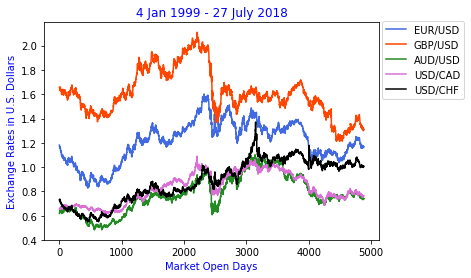

In [10]:
plt.plot (EUR_USD,color='royalblue')
plt.plot (GBP_USD,color='orangered')
plt.plot (AUD_USD,color='forestgreen')
plt.plot (CAD_USD,color='orchid')
plt.plot (CHF_USD,color='k')
plt.xlabel ('Market Open Days', color='blue')
plt.ylabel ('Exchange Rates in U.S. Dollars', color='blue')
plt.title ('4 Jan 1999 - 27 July 2018', color='blue')
plt.legend(bbox_to_anchor=(1.27, 1.03))

# Resetting the DataFrame   

In [11]:
df2 = pd.DataFrame(data=[EUR_USD,GBP_USD,AUD_USD,CAD_USD,CHF_USD])

df2.reset_index()

df2.transpose()

USD_df = df2.transpose()

USD_df.rename (columns={'USD/CAD' : 'CAD/USD'}, inplace=True)

USD_df.rename (columns={'USD/CHF' : 'CHF/USD'}, inplace=True)

USD_df.head()

,EUR/USD,GBP/USD,AUD/USD,CAD/USD,CHF/USD
0,1.181,1.658,0.618,0.655,0.732
1,1.176,1.657,0.622,0.657,0.730
2,1.164,1.655,0.628,0.662,0.722
3,1.167,1.649,0.634,0.662,0.721
4,1.155,1.641,0.633,0.660,0.716


# Setting up the correlation matrix heatmap for Second Data Visual

Text(0.5,1,'Python Data Visualzation of a Correlation Matrix Heatmap:  \nSome of the Most Traded Currencies in the World from 4 Jan 1999 to 27 July 2018\nAll Daily Exchange Rates expressed in US Dollars')

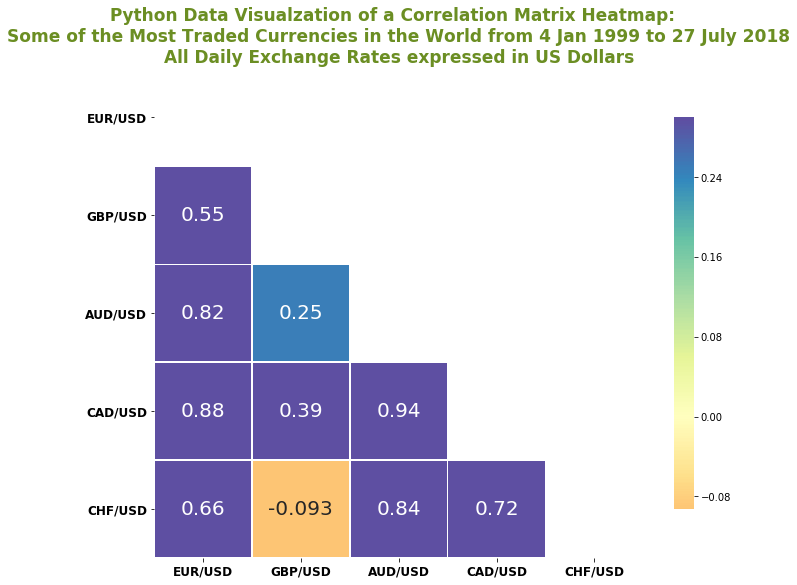

In [12]:
corr = USD_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=.3, center=0, annot_kws={"size": 20}, 
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.yticks(rotation=0, fontweight='bold', fontsize=12)
plt.xticks(fontweight='bold', fontsize=12)
plt.title('Python Data Visualzation of a Correlation Matrix Heatmap:  \nSome of the Most Traded Currencies in the World from 4 Jan 1999 to 27 July 2018\nAll Daily Exchange Rates expressed in US Dollars',
          fontweight='bold', fontsize=17,color='olivedrab')

# Load the data of independent variables

In [13]:
equity_index, bond_index = df.loc[:,'SP500'], df.loc[:,'DGS10']

# Sanity Check
len(equity_index), len(bond_index), len(EUR_USD), len(GBP_USD), len (AUD_USD), len (USD_CAD), len (USD_CHF)

(4885, 4885, 4885, 4885, 4885, 4885, 4885)

In [15]:
USD_df = USD_df.assign(equity_index=equity_index, bond_index=bond_index)

USD_df.tail(3)

,EUR/USD,GBP/USD,AUD/USD,CAD/USD,CHF/USD,equity_index,bond_index
4882,1.168,1.315,0.741,0.763,1.006,2846.070,2.940
4883,1.165,1.312,0.738,0.765,1.006,2837.440,2.980
4884,1.166,1.312,0.741,0.766,1.006,2818.820,2.960


# Run the Regressions

In [36]:
# Inspect the results with the first currency exchange rate, the Euro
regr = linear_model.LinearRegression()
Y = df['EUR/USD']
X = df[['SP500', 'DGS10']]
regr.fit(X, Y)

print('\tEUR Coefficients: \t', regr.coef_)
print('\tEUR Intercept: \t', regr.intercept_)
print('\tEUR R-squared:' , regr.score(X, Y) , '\n')


EUR_coeffs = regr.coef_
EUR_intrcpt = regr.intercept_
EUR_rsqd = regr.score(X, Y)
##########################################
# Inspect the results with the second currency exchange rate, the British Pound 
regr = linear_model.LinearRegression()
Y = df['GBP/USD']
X = df[['SP500', 'DGS10']]
regr.fit(X, Y)

print('\tGBP Coefficients: \t', regr.coef_)
print('\tGBP Intercept: \t', regr.intercept_)
print('\tGBP R-squared:' , regr.score(X, Y) , '\n')

GBP_coeffs = regr.coef_
GBP_intrcpt = regr.intercept_
GBP_rsqd = regr.score(X, Y)
##########################################
# Inspect the results with the third currency exchange rate the Australian Dollar
regr = linear_model.LinearRegression()
Y = df['AUD/USD']
X = df[['SP500', 'DGS10']]
regr.fit(X, Y)

print('\tAUD Coefficients: \t', regr.coef_)
print('\tAUD Intercept: \t', regr.intercept_)
print('\tAUD R-squared:' , regr.score(X, Y) , '\n')

AUD_coeffs = regr.coef_
AUD_intrcpt = regr.intercept_
AUD_rsqd = regr.score(X, Y)
##########################################
# Inspect the results with the fourth currency exchange rate the Canadian Dollar
regr = linear_model.LinearRegression()
Y = USD_df['CAD/USD']
X = df[['SP500', 'DGS10']]
regr.fit(X, Y)

print('\tCAD Coefficients: \t', regr.coef_)
print('\tCAD Intercept: \t', regr.intercept_)
print('\tCAD R-squared:' , regr.score(X, Y) , '\n')

CAD_coeffs = regr.coef_
CAD_intrcpt = regr.intercept_
CAD_rsqd = regr.score(X, Y)
##########################################
# Inspect the results with the fifth currency exchange rate the Swiss Franc
regr = linear_model.LinearRegression()
Y = USD_df['CHF/USD']
X = df[['SP500', 'DGS10']]
regr.fit(X, Y)

print('\tCHF Coefficients: \t', regr.coef_)
print('\tCHF Intercept: \t', regr.intercept_)
print('\tCHF R-squared:' , regr.score(X, Y) , '\n')


CHF_coeffs = regr.coef_
CHF_intrcpt = regr.intercept_
CHF_rsqd = regr.score(X, Y)

	EUR Coefficients: 	 [-0.00011311 -0.06944921]
	EUR Intercept: 	 1.6256388510814124
	EUR R-squared: 0.22188356144235488 

	GBP Coefficients: 	 [-0.00013503  0.028195  ]
	GBP Intercept: 	 1.7073193862697968
	GBP R-squared: 0.20686460546972393 

	AUD Coefficients: 	 [-5.48417693e-05 -8.02574018e-02]
	AUD Intercept: 	 1.149876896946223
	AUD R-squared: 0.3925910323233447 

	CAD Coefficients: 	 [-7.50628136e-05 -5.83696206e-02]
	CAD Intercept: 	 1.1493258655091865
	CAD R-squared: 0.28549512227244833 

	CHF Coefficients: 	 [ 3.92865105e-05 -1.10443298e-01]
	CHF Intercept: 	 1.2276935528380606
	CHF R-squared: 0.7706149977591958 



In [52]:
coefficients = {'coeffs': [EUR_coeffs, GBP_coeffs, AUD_coeffs, CAD_coeffs, CHF_coeffs]}

In [53]:
coefficients_df = pd.DataFrame.from_dict(coefficients)

# Residual Histograms

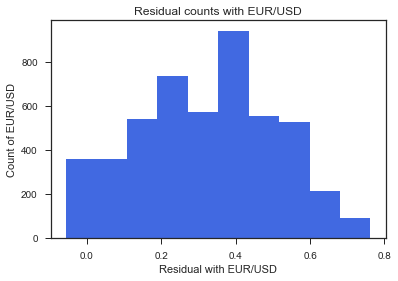

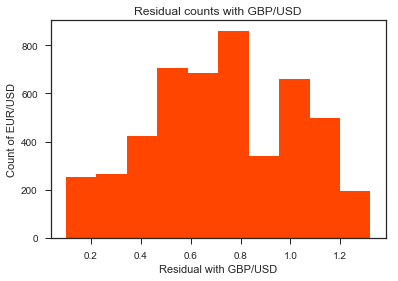

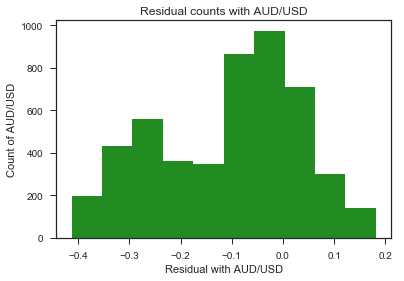

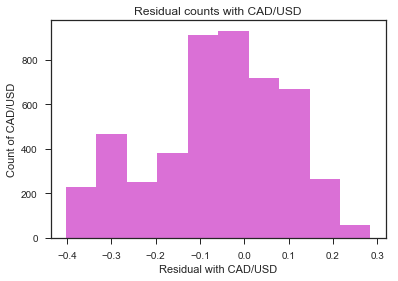

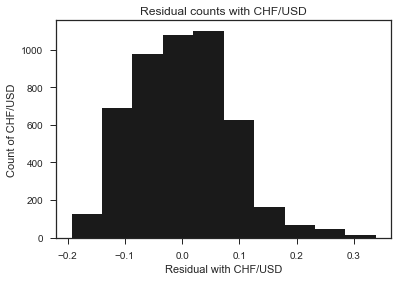

In [72]:
# EUR USD Residuals
predicted_EUR = regr.predict(X).ravel()
actual_EUR = USD_df['EUR/USD']

residual_EUR = actual_EUR - predicted_EUR

plt.hist(residual_EUR, color='royalblue')
plt.title('Residual counts with EUR/USD')
plt.xlabel('Residual with EUR/USD')
plt.ylabel('Count of EUR/USD')
plt.show()
##########################################
# GBP USD Residuals
predicted_GBP = regr.predict(X).ravel()
actual_GBP = USD_df['GBP/USD']

residual_GBP = actual_GBP - predicted_GBP

plt.hist(residual_GBP, color='orangered')
plt.title('Residual counts with GBP/USD')
plt.xlabel('Residual with GBP/USD')
plt.ylabel('Count of EUR/USD')
plt.show()
##########################################
# AUD USD Residuals
predicted_AUD = regr.predict(X).ravel()
actual_AUD = USD_df['AUD/USD']

residual_AUD = actual_AUD - predicted_AUD

plt.hist(residual_AUD,color='forestgreen')
plt.title('Residual counts with AUD/USD')
plt.xlabel('Residual with AUD/USD')
plt.ylabel('Count of AUD/USD')
plt.show()
##########################################
# CAD USD Residuals
predicted_CAD = regr.predict(X).ravel()
actual_CAD = USD_df['CAD/USD']

residual_CAD = actual_CAD - predicted_CAD

plt.hist(residual_CAD, color='orchid')
plt.title('Residual counts with CAD/USD')
plt.xlabel('Residual with CAD/USD')
plt.ylabel('Count of CAD/USD')
plt.show()
##########################################
# CHF USD Residuals
predicted_CHF = regr.predict(X).ravel()
actual_CHF = USD_df['CHF/USD']

residual_CHF = actual_CHF - predicted_CHF

plt.hist(residual_CHF, color='k')
plt.title('Residual counts with CHF/USD')
plt.xlabel('Residual with CHF/USD')
plt.ylabel('Count of CHF/USD')
plt.show()

# Residual Scatter Plots

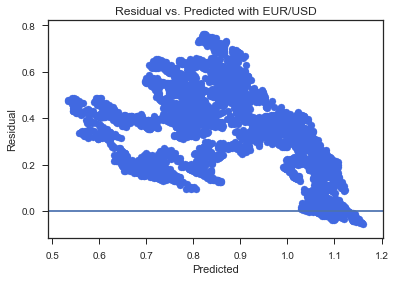

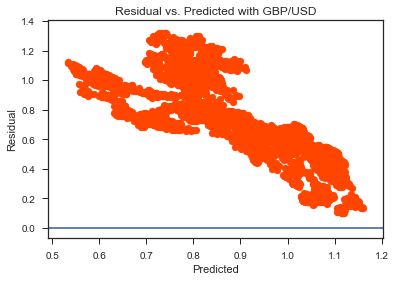

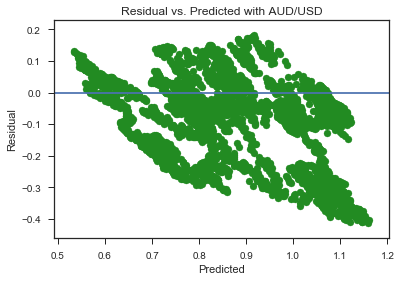

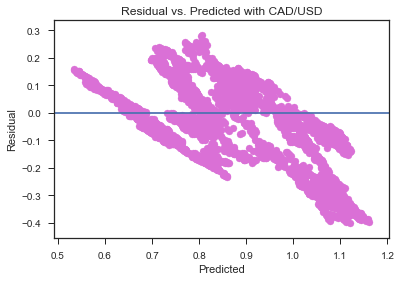

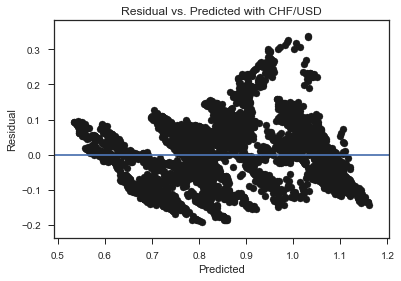

In [73]:
# EUR USD Residuals
plt.scatter(predicted_EUR, residual_EUR,color='royalblue')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted with EUR/USD')
plt.show()
##########################################
# GBP USD Residuals
plt.scatter(predicted_GBP, residual_GBP,color='orangered')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted with GBP/USD')
plt.show()
##########################################
# AUD USD Residuals
plt.scatter(predicted_AUD, residual_AUD, color='forestgreen')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted with AUD/USD')
plt.show()
##########################################
# CAD USD Residuals
plt.scatter(predicted_CAD, residual_CAD,color='orchid')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted with CAD/USD')
plt.show()
##########################################
# CHF USD Residuals
plt.scatter(predicted_CHF, residual_CHF,color='k')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted with CHF/USD')
plt.show()